# Unravelling the Human Interaction with Generative AI-Based Decision Support in Healthcare

### CAS ADS Module 3 by Mayra Spizzo and Salomé Wittwer

## Introduction

add text here
- Intro slide mit Problemstellung
- Slide mit Lösungsmöglichkeit (Was weiss man bis jetzt?)
- ChatGPT als eine Lösungsmöglichkeit

## Data Collection and Description


*   The participation in the study is possible for all medical students at the Charité Medical School in Berlin that are in the fourth year of their studies (N = 640), are at least 18 years old, and have given their written consent for participation.

*   Data collection started on 22 April, 2024 and until 6 October, 2024




*   The medical students are given diagnostic tasks consist of two patient cases that are presented in random order. The patient cases in each of the two diagnostic tasks are based on real emergency cases

*   The participants are randomly assigned to one condition (i.e., either to the human coach or ChatGPT). Participants have the possibility to chat with
their assigned assistant in real time (i.e., a human coach or ChatGPT) as a support to solve the diagnostic task. During the diagnostic tasks, all clicks, noted differential diagnoses, and chat interactions are logged with timestamps

* Hier kann ich dann auch noch ein paar Grafiken einfügen zur Illustration

explain the variables available and used, such that following chapters are understandable











In [43]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


## Descriptive Statistics

add text here

In [ ]:
# load data
df = pd.read_csv("Daten_Experiment.csv", sep=';')


In [36]:
# data set overview
#get variables
n_participants = df['Id'].nunique()
human_interaction = df['Condition'].value_counts()['Human']
gpt_interaction = df['Condition'].value_counts()['GPT']
time_per_patient = df['TimePatientSeconds'].mean()
time_per_patient_human = df[df['Condition'] == 'Human']['TimePatientSeconds'].mean()
time_per_patient_gpt = df[df['Condition'] == 'GPT']['TimePatientSeconds'].mean()
amount_interaction = df['AmountInteraction'].mean()
amount_patient_ratio = df['AmountPatientRatio'].mean()


In [40]:
from IPython.display import Markdown, display

table_md = f"""

| Variable             | Observations|
|-------------------------|-------|
|Number of participants | {n_participants} |
|Human interactions | {human_interaction} |
|GPT interactions| {gpt_interaction} |
|Average time per patient (seconds)| {round(time_per_patient)} |
|Average time per patient - Human (seconds)| {round(time_per_patient_human)} |
|Average time per patient - GPT (seconds)| {round(time_per_patient_gpt)} |
|Average amount of interaction| {round(amount_interaction)} |
|Patient information viewed by medical student | {round(amount_patient_ratio,2)} |

"""
# Display Table
display(Markdown(table_md))



| Variable             | Observations|
|-------------------------|-------|
|Number of participants | 57 |
|Human interactions | 27 |
|GPT interactions| 30 |
|Average time per patient (seconds)| 205 |
|Average time per patient - Human (seconds)| 217 |
|Average time per patient - GPT (seconds)| 194 |
|Average amount of interaction| 19 |
|Patient information viewed by medical student | 0.58 |



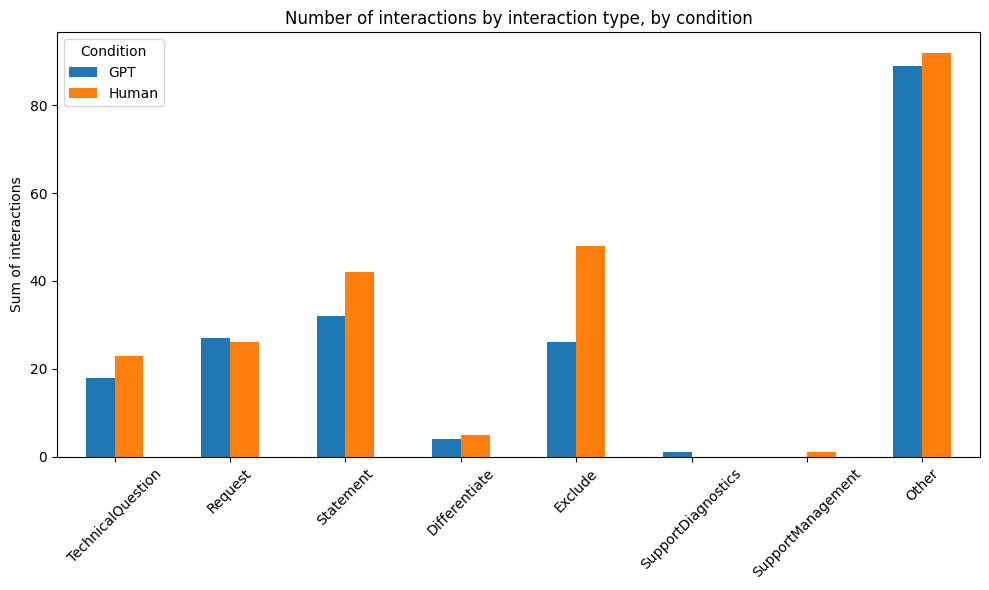

In [62]:
df = pd.DataFrame(df)
selected_columns = ['Condition','TechnicalQuestion', 'Request', 'Statement', 'Differentiate', 'Exclude', 'SupportDiagnostics', 'SupportManagement','Other']  # Replace with desired column names

sum_replies = df[selected_columns]

grouped_sum = sum_replies.groupby('Condition').sum()
# Transpose the data to have categories on x-axis and genders as separate bars
grouped_sum = grouped_sum.T  # Transpose so categories are on x-axis

# Plotting
grouped_sum.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.title('Number of interactions by interaction type, by condition')
plt.xlabel('')
plt.ylabel('Sum of interactions')
plt.xticks(rotation=45)
plt.legend(title='Condition')
plt.tight_layout()

# Show the plot
plt.show()




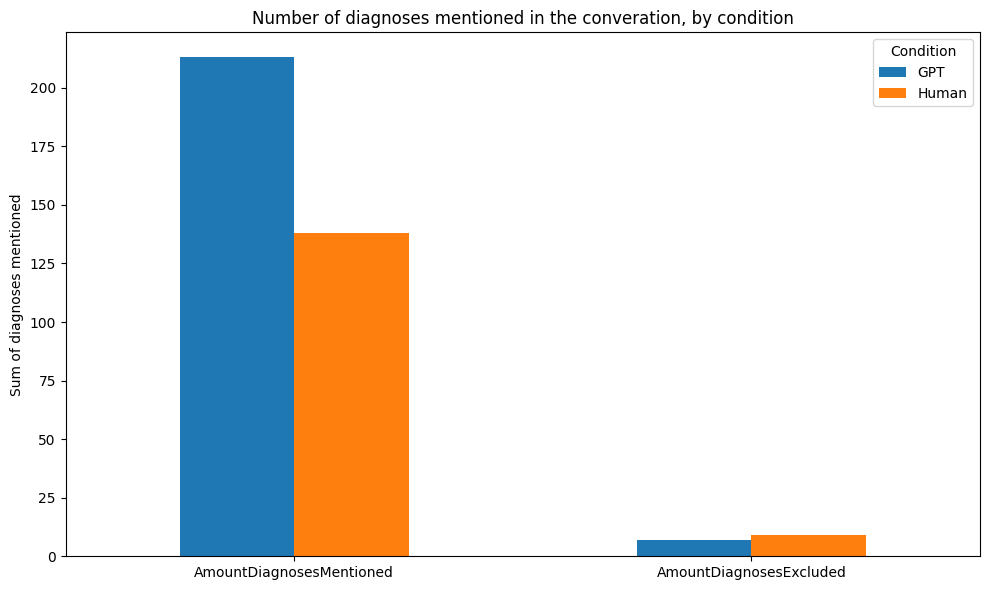

In [67]:
selected_columns = ['Condition','AmountDiagnosesMentioned', 'AmountDiagnosesExcluded']  # Replace with desired column names

sum_replies = df[selected_columns]
grouped_sum = sum_replies.groupby('Condition').sum()
# Transpose the data to have categories on x-axis and genders as separate bars
grouped_sum = grouped_sum.T  # Transpose so categories are on x-axis

# Plotting
grouped_sum.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.title('Number of diagnoses mentioned in the converation, by condition')
plt.xlabel('')
plt.ylabel('Sum of diagnoses mentioned')
plt.xticks(rotation=0)
plt.legend(title='Condition')
plt.tight_layout()

# Show the plot
plt.show()


## Unsupervised Machine Learning Methods